In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [9]:
def warpImage(image, H, dims):
    """
    Warp the given image using the homography matrix.
    
    Args:
        image: The image to be warped.
        H: The homography matrix.
        dims: The dimensions of the output image (typically the size of the second image).
        
    Returns:
        The warped image.
    """
    warped = cv2.warpPerspective(image, H, dims)
    return warped

In [10]:
def plotSideBySide(query_image, train_image, savefig_name, xlabel_a, xlabel_b):

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
    ax1.imshow(query_image)
    ax1.set_xlabel(xlabel_a, fontsize=14)

    ax2.imshow(train_image)
    ax2.set_xlabel(xlabel_b, fontsize=14)

    # Statement to be printed below the images
    plt.savefig(savefig_name+".png", bbox_inches="tight")
    plt.show()
    plt.close()

In [11]:
def getChessboardCorners(img, rows, cols, criteria):

    # img = cv2.imread(fname)
    print(img.shape)
    h,w = img.shape[0], img.shape[1]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gray = cv.equalizeHist(gray)

    _, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find the chessboard corners
    print(cv2.checkChessboard(gray, (cols, rows)))
    # cv.imwrite(fname.replace(".jpg", "_gray.jpg"), gray)
    ret, corners = cv2.findChessboardCornersSB(gray, (cols, rows), flags=0)
    print(ret)
    # print(corners.shape)

    # If found, add object points, image points (after refining them)
    if ret == True:
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        return corners2
    else:
        return None

In [12]:
def computeReprojectionErrorChessboard(ptsA, ptsB, H):
    """
    Compute the reprojection error between matched chessboard corners.
    
    Args:
        ptsA: Detected chessboard corners from image A (numpy array of 2D points).
        ptsB: Detected chessboard corners from image B (numpy array of 2D points).
        H: The homography matrix.
        
    Returns:
        The reprojection error.
    """
    # ptsA and ptsB are already in the correct format (2D numpy arrays).
    # Transform points in image A to the coordinate system of image B using homography H
    ptsA_transformed = cv2.perspectiveTransform(ptsA, H)
    
    # Calculate Euclidean distance between actual keypoints in B and transformed points
    error = np.linalg.norm(ptsA_transformed[0] - ptsB, axis=1)
    
    # Average reprojection error
    reprojection_error = np.mean(error)
    return reprojection_error


# ORB Detector

/tmp/ipykernel_10323/818308186.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  train_image = imageio.imread("./Chessboard/1.png")
/tmp/ipykernel_10323/818308186.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  query_image = imageio.imread("./Chessboard/2.png")


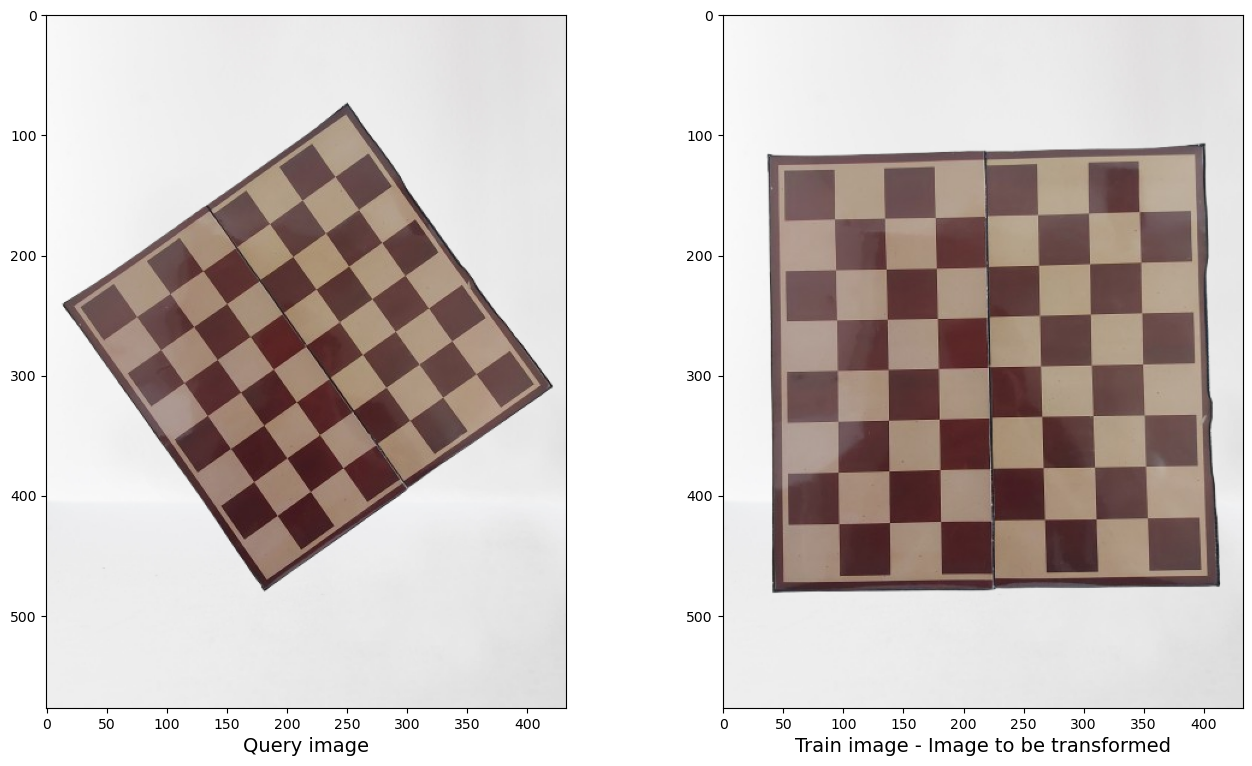

In [13]:
train_image = imageio.imread("./Chessboard/1.png")
train_image_gray = cv2.cvtColor(train_image, cv2.COLOR_RGB2GRAY)
query_image = imageio.imread("./Chessboard/2.png")
query_image_gray = cv2.cvtColor(query_image,cv2.COLOR_RGB2GRAY)

plotSideBySide(query_image, train_image, "Images_Chessboard", "Query image", "Train image - Image to be transformed")

In [14]:
rows=7
cols=7
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


train_image = imageio.imread("./Chessboard/1.png")
keypointsA = getChessboardCorners(train_image, rows, cols, criteria)
query_image = imageio.imread("./Chessboard/2.png")
keypointsB = getChessboardCorners(query_image, rows, cols, criteria)

/tmp/ipykernel_10323/206991941.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  train_image = imageio.imread("./Chessboard/1.png")


(577, 433, 4)
True
True
(577, 433, 4)
True
True


/tmp/ipykernel_10323/206991941.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  query_image = imageio.imread("./Chessboard/2.png")


In [15]:
print(keypointsA)
print(keypointsA.shape)
print("---------------------------------------------------------------------------------------------------------------")
print(keypointsB)
print(keypointsB.shape)
# # Draw and display the corners
# train_image_copy = train_image
# query_image_copy = query_image

# cv2.drawChessboardCorners(train_image_copy, (cols, rows), keypointsA, True)
# cv2.drawChessboardCorners(query_image_copy, (cols, rows), keypointsB, True)
# cv2.imwrite("1-removebg-preview-corners.png", train_image_copy)
# cv2.imwrite("5-removebg-preview-corners.png", query_image_copy)

# cv2.destroyAllWindows()

[[[ 92.46448  169.55524 ]]

 [[134.6684   169.37129 ]]

 [[176.65408  168.41396 ]]

 [[218.53574  167.31607 ]]

 [[261.57602  166.51497 ]]

 [[303.43466  164.55238 ]]

 [[345.27774  163.54282 ]]

 [[ 93.50268  212.18924 ]]

 [[135.60321  211.65228 ]]

 [[177.02838  210.58934 ]]

 [[219.50882  209.6011  ]]

 [[262.53793  208.40294 ]]

 [[304.49997  207.00055 ]]

 [[347.00037  205.50009 ]]

 [[ 94.312004 253.74588 ]]

 [[135.90773  252.81004 ]]

 [[177.86827  252.66125 ]]

 [[220.51733  251.5541  ]]

 [[262.86548  249.99779 ]]

 [[305.6022   248.68161 ]]

 [[347.35437  248.11833 ]]

 [[ 95.2627   295.9192  ]]

 [[137.00006  295.00073 ]]

 [[178.87555  294.4021  ]]

 [[221.37827  293.06134 ]]

 [[263.54483  292.1174  ]]

 [[306.54868  291.44943 ]]

 [[348.32352  290.60608 ]]

 [[ 95.576004 338.51495 ]]

 [[137.4461   337.44608 ]]

 [[179.50975  336.12283 ]]

 [[222.29405  335.59128 ]]

 [[264.79953  333.79764 ]]

 [[307.51523  333.42392 ]]

 [[350.16797  332.96277 ]]

 [[ 95.49979  380.5 

In [16]:
# M = getHomography(keypointsA, keypointsB, matches, reprojThresh=5)
H, _ = cv2.findHomography(keypointsA, keypointsB, cv2.RANSAC, 5)
print(H)

[[ 6.81960351e-01  4.68448373e-01 -6.66625859e+01]
 [-4.45086898e-01  6.86279881e-01  1.79203456e+02]
 [ 4.55677101e-05  4.92824705e-05  1.00000000e+00]]


In [17]:
# Warp image A into image B's space
warped_image = warpImage(train_image, H, (query_image.shape[1], query_image.shape[0]))

# Compute the reprojection error
error = computeReprojectionErrorChessboard(keypointsA, keypointsB, H)
print("Reprojection error:", error)

Reprojection error: 99.91699


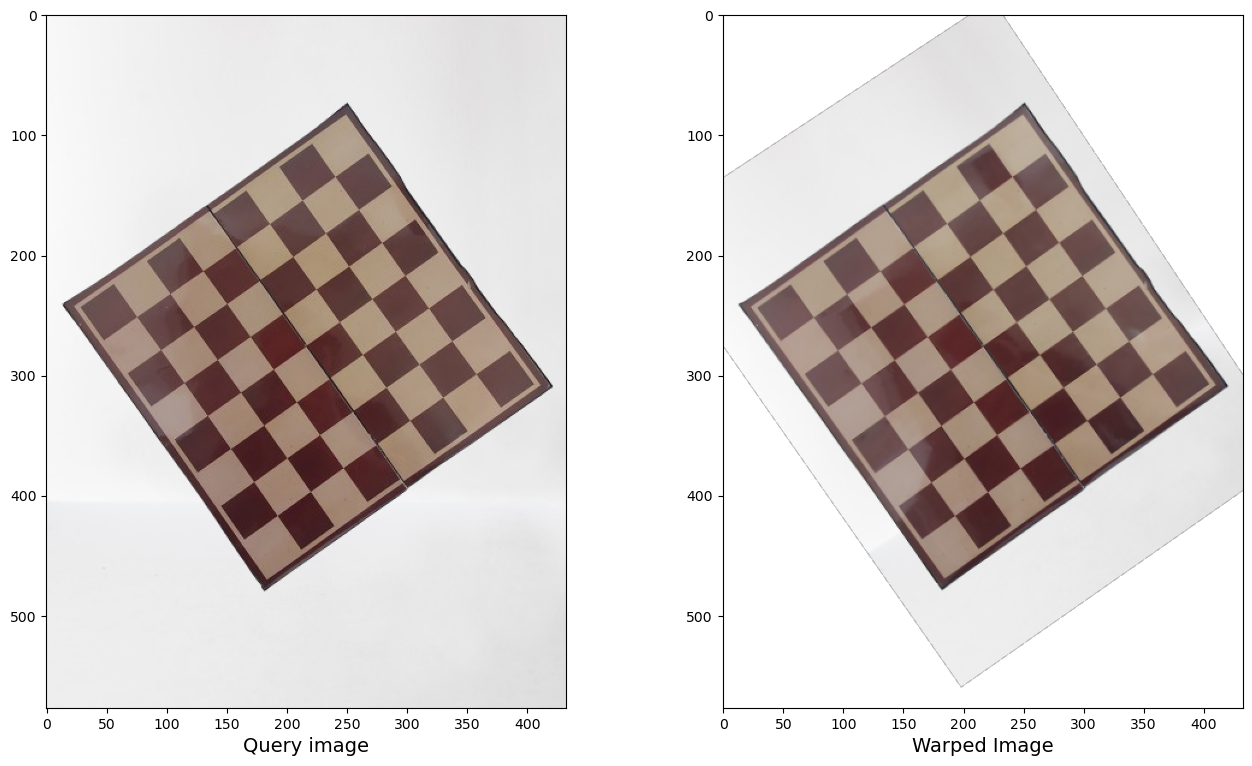

In [18]:
plotSideBySide(query_image, warped_image, "Final_Chessboard_Corners", "Query image", "Warped Image")